# Radom Forest para regresión
- Fuente ejemplo: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- Base de datos: https://drive.google.com/file/d/1pko9oRmCllAxipZoa3aoztGZfPAD2iwj/view?usp=sharing
- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#examples-using-sklearn-ensemble-randomforestregressor
- Objetivo: Predecir la temperatura máxima utilizando datos meteorológicos anteriores.

## 1. Cargar librerías y datos
### Librerías

In [24]:
#Manejo de datos
import pandas as pd
import numpy as np

#Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

#Procesamiento
from sklearn.model_selection import train_test_split

#Modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#Métricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

### Datos
 Los datos son de Seattle, obtenidos originalmente de Climate Data Online tool. 

In [25]:
#Carga de datos
features = pd.read_csv('temps.csv')
features.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


## 2. Comprensión inicial de los datos
### Datos generales

Descripción de columnas:
- year: 2016 for all data points
- month: number for month of the year
- day: number for day of the year
- week: day of the week as a character string
- temp_2: max temperature 2 days prior
- temp_1: max temperature 1 day prior
- average: historical average max temperature
- actual: max temperature measurement
- friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [26]:
#Descripción general de los datos
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### Revisión gráfica

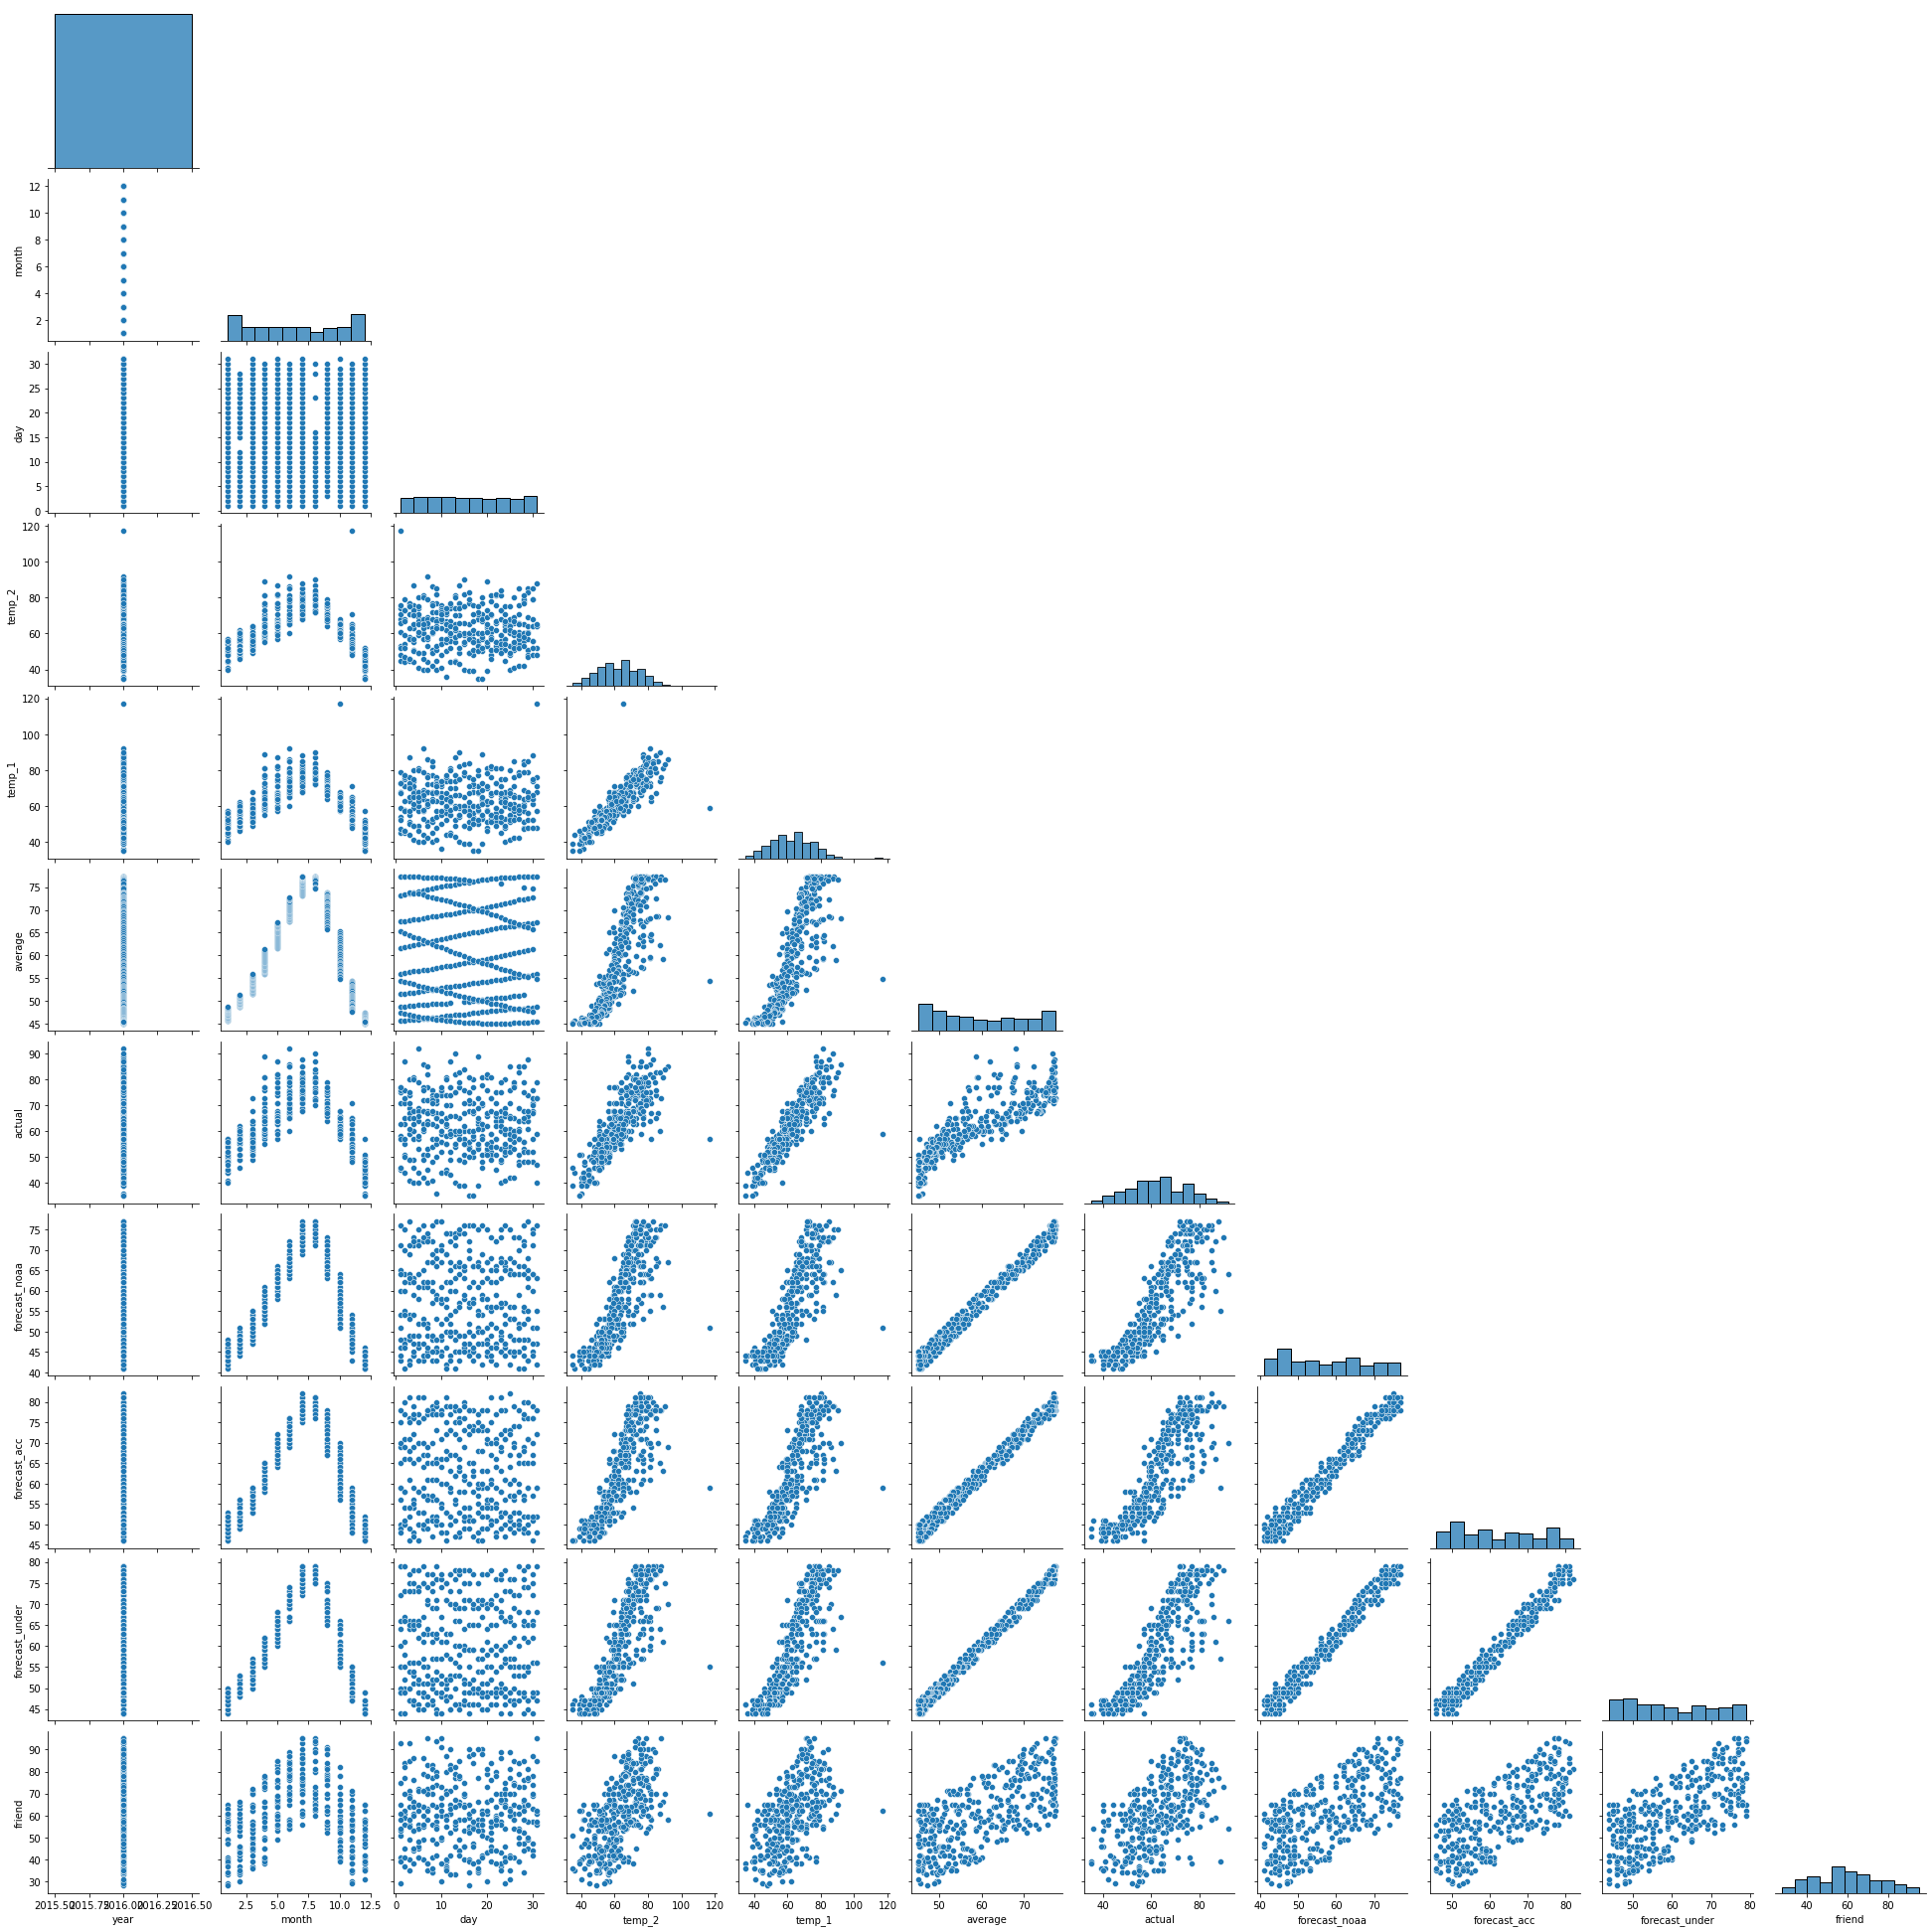

In [27]:
#Gráfica para verificar la relación no lineal
sns.pairplot(features, corner=True)

In [28]:
#Agrupación de datos por mes y día
temp_pivot = features.pivot_table(values=["temp_1","temp_2"],index=["month","day"])
temp_pivot

temp_1  temp_2
month day                
1     1        45      45
      2        45      44
      3        44      45
      4        41      44
      5        40      41
...           ...     ...
12    27       42      42
      28       47      42
      29       48      47
      30       48      48
      31       57      48

[348 rows x 2 columns]

<AxesSubplot:xlabel='month,day'>

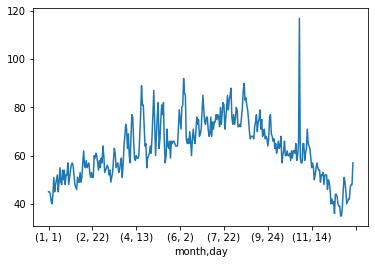

In [29]:
#Gráfica del temp1 en el tiempo
temp_pivot['temp_1'].plot()

<AxesSubplot:xlabel='month,day'>

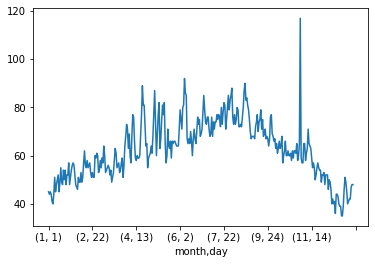

In [30]:
#Gráfica del temp2 en el tiempo
temp_pivot['temp_2'].plot()

## 3. Peparación de DataFrame
Pasos sugeridos en el ejemplo:
- One-hot encoded categorical variables
- Split data into features and labels
- Converted to arrays
- Split data into training and testing sets

### DataFrame definitivo

In [31]:
#Columnas a incluir 
df = features[['year','month','week','day','temp_2','temp_1','average','actual','friend']]
df

,year,month,week,day,temp_2,temp_1,average,actual,friend
0,2016,1,Fri,1,45,45,45.6,45,29
1,2016,1,Sat,2,44,45,45.7,44,61
2,2016,1,Sun,3,45,44,45.8,41,56
3,2016,1,Mon,4,44,41,45.9,40,53
4,2016,1,Tues,5,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2016,12,Tues,27,42,42,45.2,47,47
344,2016,12,Wed,28,42,47,45.3,48,58
345,2016,12,Thurs,29,47,48,45.3,48,65
346,2016,12,Fri,30,48,48,45.4,57,42


### One-Hot Encoding

In [32]:
# One-hot con pandas get_dummies
df2 = pd.get_dummies(df)
df2

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,42,1,0,0,0,0,0,0


### Train-Test split
Antes se pasa de DataFrame pandas a un Array numpy para meter en el modelo

In [33]:
#Y: variable a predecir
# Labels are the values we want to predict
labels = np.array(df2['actual'])
print(labels)

#X: variables independientes
# Remove the labels from the features
features= df2.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
print(features)

[45 44 41 40 44 51 45 48 50 52 45 49 55 49 48 54 50 54 48 52 52 57 48 51
 54 56 57 56 52 48 47 46 51 49 49 53 49 51 57 62 56 55 58 55 56 57 53 51
 53 51 51 60 59 61 60 57 53 58 55 59 57 64 60 53 54 55 56 55 52 54 49 51
 53 58 63 61 55 56 57 53 54 57 59 51 56 64 68 73 71 63 69 60 57 68 77 76
 66 59 58 60 59 59 60 68 77 89 81 81 73 64 65 55 59 60 61 64 61 68 77 87
 74 60 68 77 82 63 67 75 81 77 82 65 57 60 71 64 63 66 59 66 65 66 66 65
 64 64 64 71 79 75 71 80 81 92 86 85 67 65 67 65 70 66 60 67 71 67 65 70
 76 73 75 68 69 71 78 85 79 74 73 76 76 71 68 69 76 68 74 71 74 74 77 75
 77 76 72 80 73 78 82 81 71 75 80 85 79 83 85 88 76 73 77 73 75 80 79 72
 72 73 72 76 80 87 90 83 84 81 79 75 70 67 68 68 68 67 72 74 77 70 74 75
 79 71 75 68 69 71 67 68 67 64 67 76 77 69 68 66 67 63 65 61 63 66 63 64
 68 57 60 62 66 60 60 62 60 60 61 58 62 59 62 62 61 65 58 60 65 68 59 57
 57 65 65 58 61 63 71 65 64 63 59 55 57 55 50 52 55 57 55 54 54 49 52 52
 53 48 52 52 52 46 50 49 46 40 42 40 41 36 44 44 43

In [34]:
# Dividir dataframe en sets de training y testing 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print("Train shape")
print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("Test shape")
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))

Train shape
X_train:(261, 14)
y_train:(261,)
Test shape
X_test:(87, 14)
y_test:(87,)


## 4. Modelo

### 4.1 Modelo ejemplo
#### Entrenamiento

In [35]:
#Entrenamiento
# Modelo con 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Aplicar modelo en training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [36]:
#Score: Coeficiente de determinación r^2
rf.score(X_train, y_train)

0.9738476317669826

#### Predicción

In [37]:
# Predecir con test data
predictions = rf.predict(X_test)
predictions

array([68.546, 60.784, 51.793, 60.927, 65.881, 70.528, 80.896, 78.619,
       62.719, 73.128, 63.602, 72.64 , 38.659, 62.429, 71.211, 56.202,
       60.822, 56.842, 57.348, 76.862, 64.103, 54.39 , 65.619, 62.349,
       58.085, 52.536, 67.117, 47.089, 61.673, 78.307, 73.671, 64.337,
       55.865, 80.073, 73.967, 61.824, 53.672, 50.83 , 68.275, 43.457,
       70.446, 57.512, 76.381, 42.691, 61.097, 73.52 , 52.555, 79.064,
       54.275, 42.529, 46.701, 42.727, 64.663, 65.748, 74.633, 61.44 ,
       55.451, 59.685, 53.377, 59.33 , 66.457, 50.433, 60.308, 70.522,
       59.998, 58.837, 71.399, 69.518, 75.912, 40.739, 78.394, 56.005,
       60.448, 49.8  , 54.326, 63.446, 43.876, 76.366, 48.199, 52.312,
       53.308, 68.748, 73.033, 73.27 , 63.059, 58.739, 46.929])

In [38]:
#Score: Coeficiente de determinación r^2
rf.score(X_test, y_test)

0.8173586859802092

In [39]:
# Calcular error absoluto
errors = abs(predictions - y_test)
# Media de error absoluto - the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.83 degrees.


In [40]:
# Porcentaje de error absoluto - mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Media del MAPE
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


#### Tabla de resultados

In [41]:
tabla = pd.DataFrame(X_test).copy()
#renombrar columnas
tabla = tabla.set_axis(feature_list, axis=1)
#Agregar y_verdaderas
tabla['actual'] = y_test
#Agregar y de predicción
tabla['actual prediction'] = predictions
tabla['Diferencia'] = tabla['actual']-tabla['actual prediction']
tabla

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,actual,actual prediction,Diferencia
0,2016.0,9.0,29.0,69.0,68.0,66.1,57.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66,68.546,-2.546
1,2016.0,4.0,27.0,59.0,60.0,60.7,50.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61,60.784,0.216
2,2016.0,11.0,28.0,53.0,48.0,48.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52,51.793,0.207
3,2016.0,10.0,12.0,60.0,62.0,61.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66,60.927,5.073
4,2016.0,6.0,19.0,67.0,65.0,70.4,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,70,65.881,4.119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2016.0,6.0,4.0,71.0,80.0,67.9,76.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,81,73.033,7.967
83,2016.0,6.0,17.0,67.0,71.0,70.0,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,67,73.270,-6.270
84,2016.0,10.0,5.0,61.0,63.0,63.7,48.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66,63.059,2.941
85,2016.0,3.0,4.0,55.0,59.0,51.9,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57,58.739,-1.739


<AxesSubplot:>

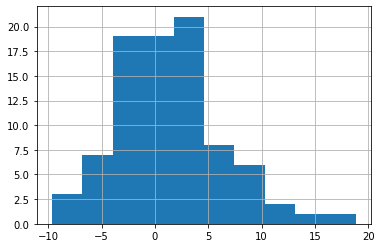

In [42]:
#Distribución de las disferencias en las predicciones
tabla.Diferencia.hist()

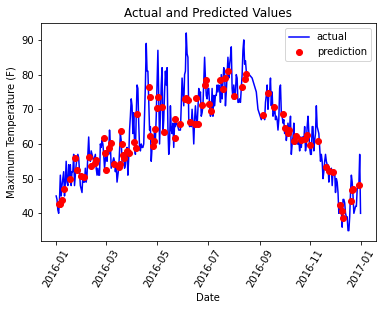

In [45]:
# datetime: para graficar serie de tiempo
import datetime

#Ajuste de datos para graficar datos como serie de tiempo
# Datos relacionados con tiempo
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# Convertir datos de tiempo a un datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Incorporar datetime al Dataframe de entrenamiento
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# predicción por fecha
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]
# Columna de fechas
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convertir a un datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Incorporar datetime al DataFrame de predicciones
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Graficar los valores reales
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Graficar las predicciones
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Etiquetas del gráfico
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## 5. Features importance
Cálculo de la importancia de cada variable en el modelo, ya sea por el índice gini o entropía

In [46]:
# Importancia: Numerical feature importances
importances = list(rf.feature_importances_)
# Tuplas de las variables y su importancia
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Acomodo de mayor a menor
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Formato de salida
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


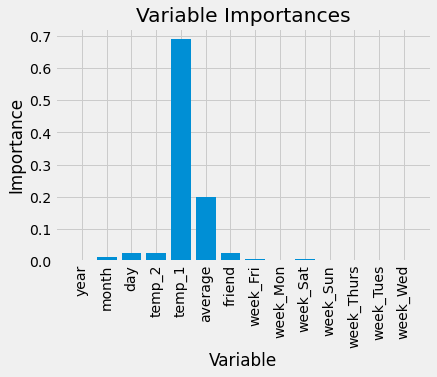

In [47]:
%matplotlib inline
# Estilo de gráfico
plt.style.use('fivethirtyeight')
# Lista de variables
x_values = list(range(len(importances)))
# Gráfico
plt.bar(x_values, importances, orientation = 'vertical')
# Personalizar gráfico
plt.xticks(x_values, feature_list, rotation='vertical')
# Etiquetas del gráfico
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');